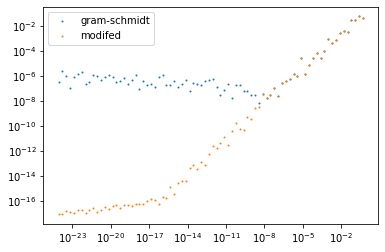

In [1]:
import numpy as np
from numpy import random as rand
from matplotlib import pyplot as plt

def clgrQR(A):
	[m,n]=A.shape
	V=np.array(A.copy(), np.float)
	Q=np.eye(m,n)
	R=np.zeros((n,n))
	for j in range(n):
		for i in range(j):
			R[i,j]=np.dot(Q[:,i],A[:,j])
			V[:,j]-=R[i,j]*Q[:,i]
		R[j,j]=np.linalg.norm(V[:,j])
		Q[:,j]=V[:,j]/R[j,j]
	return Q,R
def mgrQR(A):
	[m,n]=A.shape
	Q=np.array(A.copy(), np.float)
	R=np.zeros((n,n))
	for i in range(0,n-1):
		R[i,i]=np.linalg.norm(Q[:,i])
		Q[:,i]/=R[i,i]
		R[i:i+1,i+1:n]=np.dot(np.transpose(Q[:,i:i+1]), Q[:,i+1:n])
		Q[:,i+1:n]-=np.dot(np.transpose([Q[:,i]]),R[i:i+1,i+1:n])

	R[n-1,n-1]=np.linalg.norm(Q[:,n-1])
	Q[:,n-1]/=R[n-1,n-1]
	return Q,R
def house(A):
	[m,n]=A.shape
	R=np.array(A.copy(), np.float)
	V=np.zeros((m,n))
	for k in range(0,min(m-1,n)):
		x=R[k:m,k:k+1]
		v=x+np.sign(x[0])*np.linalg.norm(x)*np.eye(len(x),1)
		V[k:m,k:k+1]=v
		R[k:m,k:n]-=(np.dot((2*v),(np.dot(np.transpose(v),R[k:m,k:n]))))/np.dot(np.transpose(v),v)
	R=np.triu(R[0:n,0:n])

	[m,n]=V.shape
	Q=np.eye(m)
	for j in np.arange(min(m-1,n),0,-1):
		y=V[:,j-1]
		Q-=np.dot(2*np.transpose([y]),np.dot([y],Q))/(np.dot(y,np.transpose([y])))

	return Q,R
plt.xscale('log')
plt.yscale('log')

[U,X]=np.linalg.qr(rand.randn(80,80))
[V,X]=np.linalg.qr(rand.randn(80,80))
J=np.zeros(80)
for i in range(1,81):
	J[i-1]=2.**(-i)
S=np.diag(J)
A=np.dot(U,np.dot(S,V))
(Qc,Rc)=clgrQR(A)
(Qm,Rm)=mgrQR(A)

r=np.arange(0,80,1)
plt.scatter(S[r-1,r-1],Rc[r-1,r-1],s=1)
plt.scatter(S[r-1,r-1],Rm[r-1,r-1],s=1)


plt.legend(["gram-schmidt","modifed"])
plt.show()


ex.3.2.a
ans)modified version is more numerically than classical version

In [2]:
import numpy as np
from numpy import random as rand
from matplotlib import pyplot as plt

def clgrQR(A):
	[m,n]=A.shape
	V=np.array(A.copy(), np.double)
	Q=np.eye(m,n)
	R=np.zeros((n,n))
	for j in range(n):
		for i in range(j):
			R[i,j]=np.dot(Q[:,i],A[:,j])
			V[:,j]-=R[i,j]*Q[:,i]
		R[j,j]=np.linalg.norm(V[:,j])
		Q[:,j]=V[:,j]/R[j,j]
	return Q,R
def mgrQR(A):
	[m,n]=np.shape(A)
	Q=np.array(A.copy(), np.float64)
	R=np.zeros((n,n))
	for i in range(0,n-1):
		R[i,i]=np.linalg.norm(Q[:,i])
		Q[:,i]/=R[i,i]
		R[i:i+1,i+1:n]=np.dot(np.transpose(Q[:,i:i+1]), Q[:,i+1:n])
		Q[:,i+1:n]-=np.dot(np.transpose([Q[:,i]]),R[i,i+1:n].reshape(1,n-i-1))
	R[n-1,n-1]=np.linalg.norm(Q[:,n-1])
	Q[:,n-1]/=R[n-1,n-1]

	return Q,R
def house(A):
	[m,n]=A.shape
	R=np.array(A.copy(), np.double)
	V=np.zeros((m,n))
	for k in range(0,min(m-1,n)):
		x=R[k:m,k:k+1]
		v=x+np.sign(x[0])*np.linalg.norm(x)*np.eye(len(x),1)
		V[k:m,k:k+1]=v
		R[k:m,k:n]-=(np.dot((2*v),(np.dot(np.transpose(v),R[k:m,k:n]))))/np.dot(np.transpose(v),v)
	R=np.triu(R[0:n,0:n])

	[m,n]=V.shape
	Q=np.eye(m)
	for j in np.arange(min(m-1,n),0,-1):
		y=V[:,j-1]
		Q-=np.dot(2*np.transpose([y]),np.dot([y],Q))/(np.dot(y,np.transpose([y])))

	return Q,R

B=np.array([[.70000, .70711],[ .70001, .70711]])
(Qm2,Rm2)=mgrQR(B)
(Q2,R2)=house(B)

print(np.dot(np.transpose(Q2),Q2))
print(np.dot(np.transpose(Qm2),Qm2))
print(np.linalg.norm(np.dot(np.transpose(Q2),Q2-np.eye(2))))
print(np.linalg.norm(np.dot(np.transpose(Qm2),Qm2-np.eye(2))))


[[1.00000000e+00 1.66533454e-16]
 [1.66533454e-16 1.00000000e+00]]
[[1.00000000e+00 2.30143682e-11]
 [2.30143682e-11 1.00000000e+00]]
2.0000000000000004
1.9999999999755893


ex.3.2.b
ans)householder is better than modified gs

In [3]:
import numpy as np
import numpy.linalg as nla
import matplotlib.pyplot as plt

def Angle_ftn(x,z):
    if z == 0.0:  return 1.0,0.0
    r = np.hypot(x,z) 
    return x/r, -z/r

def givensT(A,t, r1, r2):
    (c,s)=t
    givensT = np.array([[c,-s],[s,c]])
    A[[r1,r2],:] = np.dot(givensT, A[[r1,r2],:])

def givens_qr(A):
    m,n = A.shape
    Q = np.eye(m)
    for i in range(0,n):
        for j in reversed(range(i+1, m)): 
            coeffs = Angle_ftn(A[j-1, i], A[j,i])
            givensT(A[:, i:],coeffs, j-1, j) 
            givensT(Q[:, i:],coeffs, j-1, j)
    return Q,A

A = np.arange(1.0, 21.0).reshape(5,4)

print("Q of QR-dcomp =",nla.qr(A)[0])
print("R of QR-dcomp =",nla.qr(A)[1])
print("Q,Rof QR-dcomp by my givens =\n",givens_qr(A))


Q of QR-dcomp = [[-0.04207032 -0.77345335  0.60499057 -0.06750472]
 [-0.21035158 -0.5057195  -0.71384607 -0.43614611]
 [-0.37863285 -0.23798565 -0.24440596  0.85969998]
 [-0.54691411  0.02974821  0.21038788 -0.14094276]
 [-0.71519538  0.29748206  0.14287359 -0.21510639]]
R of QR-dcomp = [[-2.37697286e+01 -2.56628929e+01 -2.75560571e+01 -2.94492213e+01]
 [ 0.00000000e+00 -1.18992823e+00 -2.37985647e+00 -3.56978470e+00]
 [ 0.00000000e+00  0.00000000e+00  7.06765091e-15  3.46008714e-15]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.95064478e-15]]
Q,Rof QR-dcomp by my givens =
 (array([[ 0.04207032,  0.21035158,  0.37863285,  0.54691411,  0.71519538],
       [-0.99911465,  0.5057195 ,  0.23798565, -0.02974821, -0.29748206],
       [ 0.        , -0.63245553, -0.60442594, -0.42939669,  0.58393977],
       [ 0.        ,  0.54772256,  0.04542297, -0.1909343 ,  0.17647404],
       [ 0.        ,  0.        , -0.65772794, -0.6922157 ,  0.16694688]]), array([[ 2.37697286e+01,  2.56628929e+0

ex.3.3
ans) sign is changed

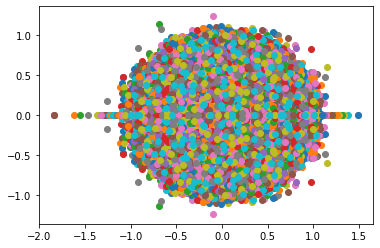

0.9319817357837049
0.6368911982488568
0.5055349420337649
0.8472273674171218
0.5964426314916155
0.41250545802391025
1.352953541975718
0.906726134942318
0.5475489195745824
0.26896032690462013
0.6990195922202269
0.5483597620702947
0.9248278746885404
0.599447257039833
0.8266127918694237
0.5292212059452697
0.443339237408247
0.7770027253998879
0.5657017867923713
0.9547748864881538
0.40825407184360873
0.6790842380817252
0.7361583346581038
0.44005684007691115
0.3511273681494813
0.5975621203530648
0.6331290788074091
0.34030199018064944
1.0852625649737062
0.7638895827672307
0.7559728688062446
0.7944713527731343
0.6843902971931082
0.7299337067328697
1.0426412842692518
1.4086557817706629
0.4580357736526355
0.5344218997987993
0.41609338862208034
0.3509745688410193
0.8764771809578512
0.6707261477769535
0.32091207321574355
0.49657005619493755
0.2486694517197514
0.6372723099590292
0.4176067582753291
0.6100274701569317
0.6874486455392115
0.5706657699368161
0.7492920015203269
0.29898812343855585
0.55529

In [9]:
import numpy as np
from numpy import random as rand
import numpy.linalg as nla
import matplotlib.pyplot as plt

for j in range(5):
	m=8*2**j
	for i in range(100):
		a=rand.randn(m,m)/np.sqrt(m)
		A=np.array(nla.eig(a)[0])
		plt.scatter(np.real(A),np.imag(A))
plt.show()

for j in range(5):
	m=8*2**j
	for i in range(100):
		a=rand.randn(m,m)/np.sqrt(m)
		A=np.array(nla.eig(a)[0])
		print(np.linalg.norm(a, 2)-max(abs(A)))
print("")
for j in range(5):
	m=8*2**j
	E=np.zeros(100)
	for i in range(100):
		a=rand.randn(m,m)/np.sqrt(m)
		A=np.array(nla.eig(a)[0])
		E[i]=min(abs(A))
	n=0
	for i in range(100):
		if E[i]<=1/2:n+=1
	print(n/100)
	n=0
	for i in range(100):
		if E[i]<=1/32:n+=1
	print(n/100)
	n=0
	for i in range(100):
		if E[i]<=1/64:n+=1
	print(n/100)
	n=0
	for i in range(100):
		if E[i]<=1/256:n+=1
	print(n/100)
print("")



ex.4.3

ans of a) the point is uniformly distributed near 0

ans of b) no

ans of c) become smaller

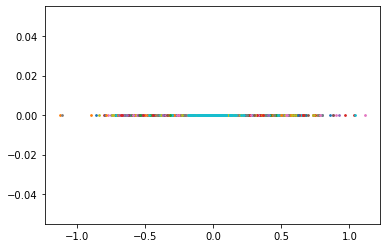

0.8131883692951297
0.8618750114586005
0.6963841056239453
0.5770319638911203
1.007716477970726
0.8409121138017384
0.893778274049306
0.883283767269776
1.0384625866925852
0.7299592345051326
0.6871254493085561
0.8697383024196377
0.6541397095133369
0.738078868420875
0.8158518116692653
0.7999543544794878
1.1302789745530142
1.1023657184295796
0.5624192881722733
0.4022369604825675
0.5883570343301403
0.7470090242120297
0.7998155142559766
0.5348262868151147
0.3688790853991799
0.7582766519903534
0.8366729854385474
0.8957558181718016
0.6927727116092297
1.0722795332997421
0.3961231862512137
1.0084935049353327
0.6609279285040267
0.6408973416407084
0.9584612525298116
0.6782298400612775
0.6613583868013386
0.9356929536377321
1.0634297337266807
0.8649902385575655
1.190602826192562
0.7517665341305958
0.4761662973493913
1.0392536609996674
0.8648777393782128
0.8516711503324568
1.0559498914456942
1.1106628421046991
0.735100125115675
1.2319861534812087
0.5003822917195482
0.8624904420792067
0.6163490305417731

In [8]:
import numpy as np
from numpy import random as rand
import numpy.linalg as nla
import matplotlib.pyplot as plt
for j in range(5):
	m=8*2**j
	for i in range(100):
		a=np.triu(rand.randn(m,m)/np.sqrt(m))
		A=np.array(nla.eig(a)[0])
		plt.scatter(np.real(A),np.imag(A),s=3)
plt.show()

for j in range(5):
	m=8*2**j
	for i in range(100):
		a=np.triu(rand.randn(m,m)/np.sqrt(m))
		A=np.array(nla.eig(a)[0])
		print(np.linalg.norm(a, 2)-max(abs(A)))
print("")
for j in range(5):
	m=8*2**j
	E=np.zeros(100)
	for i in range(100):
		a=np.triu(rand.randn(m,m)/np.sqrt(m))
		A=np.array(nla.eig(a)[0])
		E[i]=min(abs(A))
	n=0
	for i in range(100):
		if E[i]<=1/2:n+=1
	print(n/100)

	n=0
	for i in range(100):
		if E[i]<=1/32:n+=1
	print(n/100)
	n=0

	for i in range(100):
		if E[i]<=1/64:n+=1
	print(n/100)
	n=0

ex.4.2
ans of d)
eigen value is only real number
no
sigma min is decreasing faster than normal mtx

In [6]:
import numpy as np
import numpy.linalg as nla
def clgrQR(A):
	[m,n]=A.shape
	V=np.array(A.copy(), np.double)
	Q=np.eye(m,n)
	R=np.zeros((n,n))
	for j in range(n):
		for i in range(j):
			R[i,j]=np.dot(Q[:,i],A[:,j])
			V[:,j]-=R[i,j]*Q[:,i]
		R[j,j]=np.linalg.norm(V[:,j])
		Q[:,j]=V[:,j]/R[j,j]
	return Q,R
def mgrQR(A):
	[m,n]=A.shape
	Q=np.array(A.copy(), np.double)
	R=np.zeros((n,n))
	for i in range(0,n-1):
		R[i,i]=np.linalg.norm(Q[:,i])
		Q[:,i]/=R[i,i]
		for j in range(1,n-i-1):R[i,i+j]=np.dot(Q[:,i],Q[:,i+j])
		Q[:,i+1:n]-=np.dot(np.transpose([Q[:,i]]),R[i,i+1:n].reshape(1,n-i-1))

	R[n-1,n-1]=np.linalg.norm(Q[:,n-1])
	Q[:,n-1]/=R[n-1,n-1]

	return Q,R
def house(A):
	[m,n]=A.shape
	R=np.array(A.copy(), np.double)
	V=np.zeros((m,n))
	for k in range(0,min(m-1,n)):
		x=R[k:m,k:k+1]
		v=x+np.sign(x[0])*np.linalg.norm(x)*np.eye(len(x),1)
		V[k:m,k:k+1]=v
		R[k:m,k:n]-=(np.dot((2*v),(np.dot(np.transpose(v),R[k:m,k:n]))))/np.dot(np.transpose(v),v)
	R=np.triu(R[0:n,0:n])

	[m,n]=V.shape
	Q=np.eye(m)
	for j in np.arange(min(m-1,n),0,-1):
		y=V[:,j-1]
		Q-=np.dot(2*np.transpose([y]),np.dot([y],Q))/(np.dot(y,np.transpose([y])))

	return Q,R

def plusol(Q,R,b):
    (n,n)=R.shape
    (m,)=np.shape(b)
    y=np.dot(np.transpose(Q),np.transpose([b]))
    x=np.zeros((n,1))
    for i in range(n):
        j=n-i-1
        x[j,0]=(y[j,0]-np.dot(R[j:j+1,j:n], x[j:n,0:1]))/R[j,j]
    return x

m=50
n=12

t=np.arange(0,1+1/(m-1),1/(m-1))
print(t.shape)
V=np.vander(t, increasing=True)
V=V[:,0:n]
print(V.shape)
b=np.cos(4*t)

(Q1,R1)=mgrQR(V)
(Q2,R2)=house(V)
(Q3,R3)=nla.qr(V)

(U, s, V1) = np.linalg.svd(V, full_matrices = False)
y=np.dot(np.transpose(U),b)

x0=np.dot(np.dot(nla.inv(np.dot(np.transpose(V),V)),np.transpose(V)),np.transpose(b))
x1=plusol(Q1,R1,b)
x2=plusol(Q2,R2,b)
x3=plusol(Q3,R3,b)
x4=np.dot(np.transpose(V1), np.dot(np.diag(1/s),y))

print("sol of a = ",np.transpose([x0]))
print("sol of b = ",np.transpose(x1))
print("sol of c = ",np.transpose(x2))
print("sol of d = ",np.transpose(x3))
print("sol of f = ",np.transpose([x4]))

(51,)
(51, 12)
sol of a =  [[ 1.05386299]
 [-0.083619  ]
 [-8.46133215]
 [ 1.4587881 ]
 [ 8.30629087]
 [ 2.46002741]
 [-7.30614949]
 [ 0.25815477]
 [ 2.21090755]
 [-0.50596229]
 [-0.1820063 ]
 [ 0.05501989]]
sol of b =  [[ 1.00000005e+00 -1.46576012e-05 -7.99944273e+00 -8.27050444e-03
   1.07302315e+01 -2.87172163e-01 -4.87650281e+00 -1.47614619e+00
   3.33443980e+00 -1.19003628e+00  1.19270430e-01 -1.04134512e+00]]
sol of c =  [[ 1.00000000e+00 -5.86272263e-07 -7.99997443e+00 -4.27819717e-04
   1.06703305e+01 -1.81641363e-02 -5.63397620e+00 -1.00706749e-01
   1.72522575e+00 -1.84081752e-02 -3.63573069e-01  8.60312928e-02]]
sol of d =  [[ 1.00000000e+00 -5.86271851e-07 -7.99997443e+00 -4.27819563e-04
   1.06703305e+01 -1.81641318e-02 -5.63397621e+00 -1.00706728e-01
   1.72522572e+00 -1.84081589e-02 -3.63573075e-01  8.60312939e-02]]
sol of f =  [[ 1.00000000e+00]
 [-5.86271858e-07]
 [-7.99997443e+00]
 [-4.27819566e-04]
 [ 1.06703305e+01]
 [-1.81641319e-02]
 [-5.63397621e+00]
 [-1.007067

ex.4.6
ans) 
[[ 1.05386299]<
 [-0.083619  ]<
 
 [-8.46133215]<
 
 [ 1.4587881 ]<
 
 [ 8.30629087]<
 
 [ 2.46002741]<
 
 [-7.30614949]<
 
 [ 0.25815477]<
 
 [ 2.21090755]<
 
 [-0.50596229]<
 
 [-0.1820063 ]<
 
 [ 0.05501989]]<
 
[[ 1.00000005e+00]<
 [-1.46576012e-05]<
 [-7.99944273e+00]<
 [-8.27050444e-03]<
 [ 1.07302315e+01]<
 [-2.87172163e-01]<
 [-4.87650281e+00]<
 [-1.47614619e+00]<
 [ 3.33443980e+00]<
 [-1.19003628e+00]<
 [ 1.19270430e-01]<
 [-1.04134512e+00]]<
 
[[ 1.00000000e+00
 [-5.86272263e-07]
 [-7.99997443e+00]
 [-4.27819717e-04]
 [ 1.06703305e+01]
 [-1.81641363e-02]
 [-5.63397620e+00]
 [-1.00706749e-01]
 [ 1.72522575e+00]
 [-1.84081752e-02]
 [-3.63573069e-01]
 [ 8.60312928e-02]]
 
[[ 1.00000000e+00]
 [-5.86271851e-07]
 [-7.99997443e+00]
 [-4.27819563e-04]
 [ 1.06703305e+01]
 [-1.81641318e-02]
 [-5.63397621e+00]
 [-1.00706728e-01]
 [ 1.72522572e+00]
 [-1.84081589e-02]
 [-3.63573075e-01]
 [ 8.60312939e-02]]
[[ 1.00000000e+00]
 [-5.86271858e-07]
 [-7.99997443e+00]
 [-4.27819566e-04]
 [ 1.06703305e+01]
 [-1.81641319e-02]
 [-5.63397621e+00]
 [-1.00706728e-01]
 [ 1.72522572e+00]
 [-1.84081588e-02]
 [-3.63573075e-01]
 [ 8.60312939e-02]]
 
 i don't know how to shade this note, so i check it by using <